In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('time-series-19-covid-combined.csv', parse_dates=True)

In [3]:
# Setting the 'Date' datetime datatype
data['Date'] = pd.to_datetime(data['Date'])

In [4]:
data.head()

,Date,Country/Region,Province/State,Lat,Long,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0
1,2020-01-23,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0
2,2020-01-24,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0
3,2020-01-25,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0
4,2020-01-26,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0


In [5]:
#data cleaning
data.drop(columns=['Province/State','Lat', 'Long'], inplace=True)

In [6]:
data['current_cases'] = data['Confirmed'] - data['Recovered'] - data['Deaths']

In [7]:
data.head()

,Date,Country/Region,Confirmed,Recovered,Deaths,current_cases
0,2020-01-22,Afghanistan,0.0,0.0,0.0,0.0
1,2020-01-23,Afghanistan,0.0,0.0,0.0,0.0
2,2020-01-24,Afghanistan,0.0,0.0,0.0,0.0
3,2020-01-25,Afghanistan,0.0,0.0,0.0,0.0
4,2020-01-26,Afghanistan,0.0,0.0,0.0,0.0


In [8]:
data['Country/Region'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guin

In [9]:
usa_query = data[data['Country/Region'] == 'US']
usa_df = usa_query[['Date', 'Confirmed', 'Deaths', 'Recovered','current_cases']]

In [10]:
usa_df.head()

,Date,Confirmed,Deaths,Recovered,current_cases
29403,2020-01-22,1.0,0.0,0.0,1.0
29404,2020-01-23,1.0,0.0,0.0,1.0
29405,2020-01-24,2.0,0.0,0.0,2.0
29406,2020-01-25,2.0,0.0,0.0,2.0
29407,2020-01-26,5.0,0.0,0.0,5.0


In [11]:
usa_df.set_index('Date')

,Confirmed,Deaths,Recovered,current_cases
Date,,,,
2020-01-22,1.0,0.0,0.0,1.0
2020-01-23,1.0,0.0,0.0,1.0
2020-01-24,2.0,0.0,0.0,2.0
2020-01-25,2.0,0.0,0.0,2.0
2020-01-26,5.0,0.0,0.0,5.0
...,...,...,...,...
2020-05-17,1486757.0,89562.0,272265.0,1124930.0
2020-05-18,1508308.0,90347.0,283178.0,1134783.0
2020-05-19,1528568.0,91921.0,289392.0,1147255.0


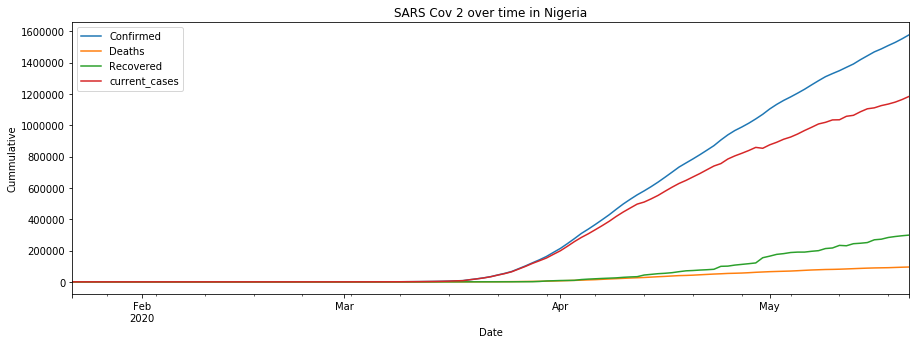

In [12]:
usa_df.plot(x='Date',figsize=(15,5), title='SARS Cov 2 over time in Nigeria')
plt.ylabel('Cummulative')
plt.savefig('SARS Cov 2 over time in Nigeria.png')

In [21]:
usa_df.sample(7)

,Confirmed,Deaths,Recovered,current_cases
Date,,,,
2020-05-17,1486757.0,89562.0,272265.0,1124930.0
2020-04-10,496846.0,22357.0,28790.0,445699.0
2020-03-16,4661.0,100.0,17.0,4544.0
2020-02-18,13.0,0.0,3.0,10.0
2020-03-07,403.0,17.0,7.0,379.0
2020-05-06,1229331.0,73455.0,189910.0,965966.0
2020-01-22,1.0,0.0,0.0,1.0


In [20]:
usa_df = usa_df.set_index('Date')

In [22]:
usa_df.shape

(121, 4)

In [24]:
train, test = usa_df.loc[:'2020-03-31'], usa_df.loc['2020-03-31':]

In [25]:
train.shape, test.shape

((70, 4), (52, 4))

### FBProphet Modelling

In [32]:
#importing package
from fbprophet import Prophet

ModuleNotFoundError: No module named 'fbprophet'

In [36]:
train.head()

,Confirmed,Deaths,Recovered,current_cases
Date,,,,
2020-01-22,1.0,0.0,0.0,1.0
2020-01-23,1.0,0.0,0.0,1.0
2020-01-24,2.0,0.0,0.0,2.0
2020-01-25,2.0,0.0,0.0,2.0
2020-01-26,5.0,0.0,0.0,5.0


In [33]:
import itertools  

In [34]:
def find_best_sarima(train, eval_metric):
    
    p = d = q = range(0, 2)
    pdq = list(itertools.product(p, d, q))
    seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

    counter = 0
    myDict = {}
    
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                counter += 1
                mod = sm.tsa.statespace.SARIMAX(train,
                                                order=param,
                                                seasonal_order=param_seasonal,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False)

                results = mod.fit()
                myDict[counter] = [results.aic, results.bic, param, param_seasonal]

            except:
                continue
                
    dict_to_df = pd.DataFrame.from_dict(myDict,orient='index')
    
    if eval_metric == 'aic':
        best_run = dict_to_df[dict_to_df[0] == dict_to_df[0].min()].index.values
        best_run = best_run[0]
    elif eval_metric == 'bic':
        best_run = dict_to_df[dict_to_df[1] == dict_to_df[1].min()].index.values
        best_run = best_run[0]
            
    model = sm.tsa.statespace.SARIMAX(train,
                                      order=myDict[best_run][2],
                                      seasonal_order=myDict[best_run][3],
                                      enforce_stationarity=False,
                                      enforce_invertibility=False).fit()
    
    best_model = {'model':model, 
                  'aic':model.aic,
                  'bic':model.bic,
                  'order':myDict[best_run][2], 
                  'seasonal_order':myDict[best_run][3]}
    
    return best_model

In [35]:
best = find_best_sarima(train, 'aic')

KeyError: 0